In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import os 
import glob
from tqdm import tqdm

In [2]:
geofiles_cellvit = glob.glob('/media/network/hdd/santosh/OPTRASCAN_IISER_Round_1_preprocessing_cellvit/20190610_316_324-13_G-13-1343_Biopsy_TNBC_HnE_40x/cell_detection/*.geojson')
geofiles_cellvit

['/media/network/hdd/santosh/OPTRASCAN_IISER_Round_1_preprocessing_cellvit/20190610_316_324-13_G-13-1343_Biopsy_TNBC_HnE_40x/cell_detection/cells.geojson',
 '/media/network/hdd/santosh/OPTRASCAN_IISER_Round_1_preprocessing_cellvit/20190610_316_324-13_G-13-1343_Biopsy_TNBC_HnE_40x/cell_detection/cell_detection.geojson']

In [3]:
geofiles_cellvit_plus = glob.glob('/media/network/hdd/santosh/OPTRASCAN_IISER_Round_1/IISER_Box_1_inference_cellViT-plus/20190610_316_324-13_G-13-1343_Biopsy_TNBC_HnE_40x_compatible_cell_detection.geojson')
geofiles_cellvit_plus

['/media/network/hdd/santosh/OPTRASCAN_IISER_Round_1/IISER_Box_1_inference_cellViT-plus/20190610_316_324-13_G-13-1343_Biopsy_TNBC_HnE_40x_compatible_cell_detection.geojson']

In [4]:
test_geo = geofiles_cellvit[0]
print(test_geo)
with open(test_geo, 'r') as f:
    geojson_data = json.load(f)

/media/network/hdd/santosh/OPTRASCAN_IISER_Round_1_preprocessing_cellvit/20190610_316_324-13_G-13-1343_Biopsy_TNBC_HnE_40x/cell_detection/cells.geojson


In [5]:
type(geojson_data)

list

In [6]:
type(geojson_data[0])

dict

In [7]:
geojson_data[0].keys()

dict_keys(['type', 'id', 'geometry', 'properties'])

In [8]:
geojson_data[0]['type']

'Feature'

In [9]:
geojson_data[1]['id']

'736832b9-3c33-4418-b13d-d5211e440f01'

In [10]:
type(geojson_data[0]['geometry']), geojson_data[0]['geometry'].keys()

(dict, dict_keys(['type', 'coordinates']))

In [11]:
geojson_data[0]['geometry']['coordinates'][0]

[[[16623, 2069],
  [16622, 2070],
  [16621, 2070],
  [16619, 2072],
  [16619, 2073],
  [16617, 2075],
  [16617, 2080],
  [16619, 2082],
  [16620, 2082],
  [16621, 2083],
  [16622, 2083],
  [16623, 2084],
  [16628, 2084],
  [16629, 2083],
  [16632, 2083],
  [16634, 2081],
  [16634, 2080],
  [16635, 2079],
  [16635, 2075],
  [16634, 2074],
  [16634, 2073],
  [16633, 2072],
  [16633, 2071],
  [16632, 2071],
  [16630, 2069],
  [16623, 2069]]]

In [12]:
geojson_data[0]['properties']

{'objectType': 'annotation',
 'classification': {'name': 'Neoplastic', 'color': [255, 0, 0]}}

CellVit

In [13]:
# Load the its corresponding json file - cellvit
with open('/media/network/hdd/santosh/OPTRASCAN_IISER_Round_1_preprocessing_cellvit/20190610_316_324-13_G-13-1343_Biopsy_TNBC_HnE_40x/cell_detection/cell_detection.json') as f:
    cellvit_cell_detection = json.load(f)

In [14]:
cellvit_cell_detection

{'wsi_metadata': {'orig_n_tiles_cols': 40,
  'orig_n_tiles_rows': 34,
  'base_magnification': 40,
  'downsampling': 1,
  'label_map': {'background': 0},
  'patch_overlap': 64,
  'patch_size': 1024,
  'base_mpp': 0.25,
  'target_patch_mpp': 0.25,
  'stain_normalization': True,
  'magnification': 40.0,
  'level': 16,
  'patch_distribution': {'0': 0},
  'label_map_inverse': {'0': 'background'}},
 'processed_patches': ['0_39',
  '2_17',
  '2_18',
  '3_18',
  '3_19',
  '3_29',
  '3_30',
  '4_10',
  '4_11',
  '4_12',
  '4_13',
  '4_17',
  '4_18',
  '4_21',
  '4_23',
  '4_29',
  '4_30',
  '4_31',
  '5_5',
  '5_7',
  '5_8',
  '5_9',
  '5_10',
  '5_11',
  '5_12',
  '5_13',
  '5_14',
  '5_29',
  '5_30',
  '6_5',
  '6_6',
  '6_7',
  '6_8',
  '6_9',
  '6_10',
  '6_11',
  '6_12',
  '6_13',
  '6_15',
  '6_16',
  '6_17',
  '6_22',
  '6_31',
  '6_32',
  '7_5',
  '7_6',
  '7_7',
  '7_9',
  '7_15',
  '7_16',
  '7_17',
  '7_18',
  '7_22',
  '7_23',
  '7_24',
  '7_25',
  '7_31',
  '7_32',
  '8_5',
  '8_20

In [15]:
cellvit_cell_detection['type_map']

{'Background': 0,
 'Neoplastic': 1,
 'Inflammatory': 2,
 'Connective': 3,
 'Dead': 4,
 'Epithelial': 5}

In [16]:
cellvit_cell_detection['cells']

[{'bbox': [[2047, 16519], [2062, 16541]],
  'centroid': [16529.612781954886, 2053.657894736842],
  'type': 2},
 {'bbox': [[2058, 16567], [2072, 16583]],
  'centroid': [16574.084745762713, 2064.3276836158193],
  'type': 2},
 {'bbox': [[2069, 16617], [2085, 16636]],
  'centroid': [16626.053278688523, 2076.5737704918033],
  'type': 1},
 {'bbox': [[2075, 16557], [2088, 16567]],
  'centroid': [16562.040404040403, 2081.282828282828],
  'type': 2},
 {'bbox': [[2076, 16518], [2085, 16526]],
  'centroid': [16521.849056603773, 2079.830188679245],
  'type': 2},
 {'bbox': [[2080, 16641], [2092, 16658]],
  'centroid': [16648.353658536584, 2085.2134146341464],
  'type': 1},
 {'bbox': [[2084, 16602], [2102, 16613]],
  'centroid': [16606.382716049382, 2092.432098765432],
  'type': 1},
 {'bbox': [[2086, 16573], [2101, 16591]],
  'centroid': [16581.83574879227, 2093.5314009661834],
  'type': 1},
 {'bbox': [[2087, 16621], [2105, 16639]],
  'centroid': [16629.54090909091, 2095.3454545454547],
  'type': 1}

In [17]:
total_cells_cellvit = len(cellvit_cell_detection['cells'])
total_cells_cellvit

78166

Cellvit_plus

In [18]:
# Load the its corresponding json file - cellvit_plus
with open('/media/network/hdd/santosh/OPTRASCAN_IISER_Round_1/IISER_Box_1_inference_cellViT-plus/20190610_316_324-13_G-13-1343_Biopsy_TNBC_HnE_40x_compatible_cell_detection.json') as f:
    cellvit_plus_cell_detection = json.load(f)

In [19]:
total_cells_cellvit_plus = len(cellvit_plus_cell_detection['cells'])
total_cells_cellvit_plus

94158

Plot the count results

In [20]:
cellvit_cell_detection['type_map']

{'Background': 0,
 'Neoplastic': 1,
 'Inflammatory': 2,
 'Connective': 3,
 'Dead': 4,
 'Epithelial': 5}

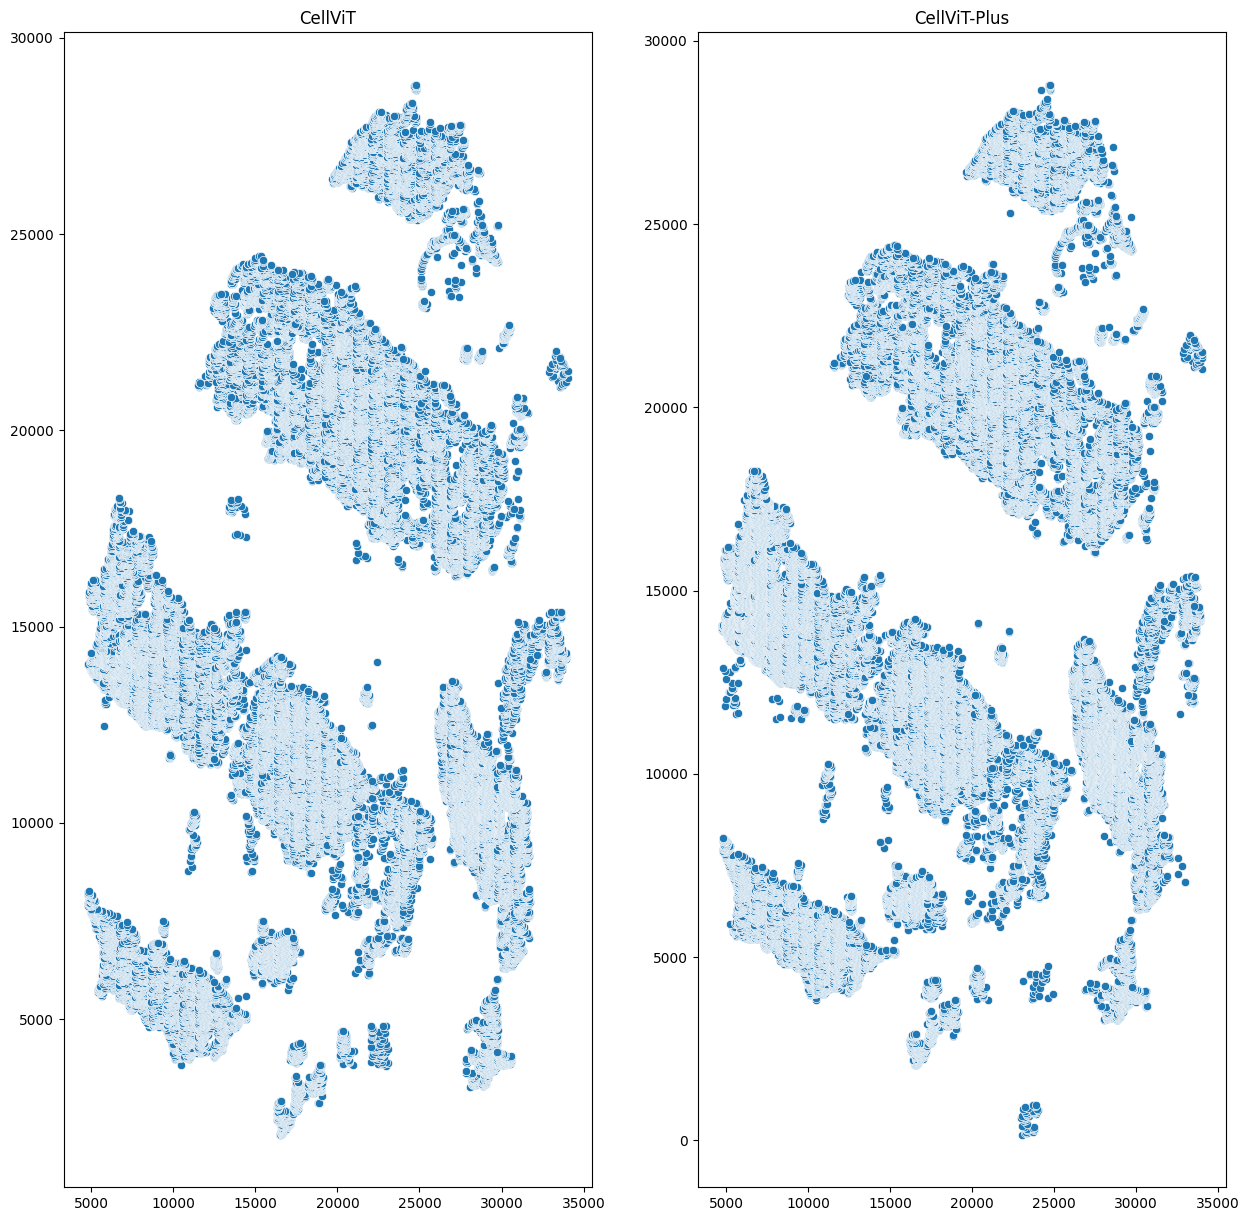

In [21]:
# Plot the cell detection results
fig, ax = plt.subplots(1, 2, figsize=(15, 15))
sns.scatterplot(x=[cell['centroid'][0] for cell in cellvit_cell_detection['cells']], 
                y=[cell['centroid'][1] for cell in cellvit_cell_detection['cells']], ax=ax[0])
ax[0].set_title('CellViT')
sns.scatterplot(x=[cell['centroid'][0] for cell in cellvit_plus_cell_detection['cells']], 
                y=[cell['centroid'][1] for cell in cellvit_plus_cell_detection['cells']], ax=ax[1])
ax[1].set_title('CellViT-Plus')
plt.show()


Cell Vit

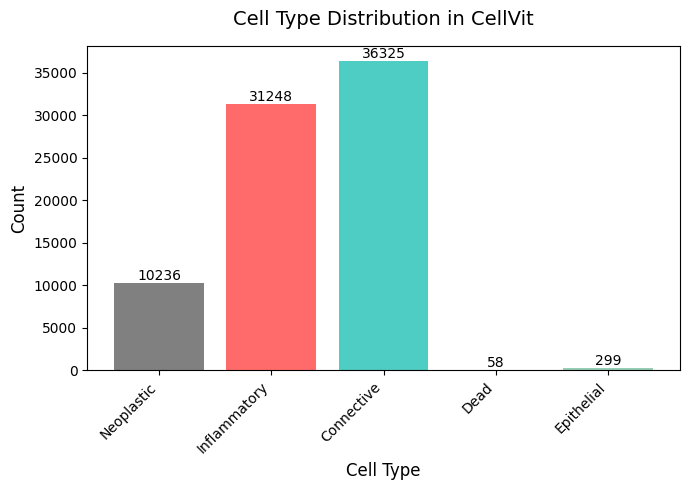

In [22]:
cell_types_cellvit = [cell['type'] for cell in cellvit_cell_detection['cells']]
cell_types = pd.DataFrame(cell_types_cellvit, columns=['cell_type'])

# Type map
type_map = {
    0: 'Background',
    1: 'Neoplastic',
    2: 'Inflammatory',
    3: 'Connective',
    4: 'Dead',
    5: 'Epithelial'
}

# Count occurrences of each cell type and map numeric indices to descriptive names
cell_counts = cell_types['cell_type'].value_counts().sort_index()
cell_counts.index = [type_map[idx] for idx in cell_counts.index]
colors = ['#808080', '#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEEAD']

# Create the bar plot
plt.figure(figsize=(7, 5))
bars = plt.bar(cell_counts.index, cell_counts.values, color=colors[:len(cell_counts)])
plt.title('Cell Type Distribution in CellVit', fontsize=14, pad=15)
plt.xlabel('Cell Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')
plt.tight_layout()
plt.show()

CellVit_Plus

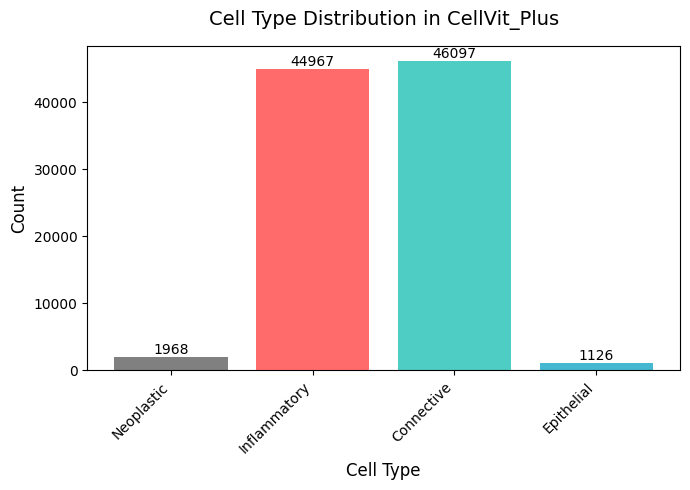

In [23]:
cell_types_cellvit_plus = [cell['type'] for cell in cellvit_plus_cell_detection['cells']]
cell_types = pd.DataFrame(cell_types_cellvit_plus, columns=['cell_type'])

# Define the type map
type_map = {
    0: 'Background',
    1: 'Neoplastic',
    2: 'Inflammatory',
    3: 'Connective',
    4: 'Dead',
    5: 'Epithelial'
}

# Count occurrences of each cell type and map numeric indices to descriptive names
cell_counts = cell_types['cell_type'].value_counts().sort_index()
cell_counts.index = [type_map[idx] for idx in cell_counts.index]
colors = ['#808080', '#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEEAD']

# Create the bar plot
plt.figure(figsize=(7, 5))
bars = plt.bar(cell_counts.index, cell_counts.values, color=colors[:len(cell_counts)])
plt.title('Cell Type Distribution in CellVit_Plus', fontsize=14, pad=15)
plt.xlabel('Cell Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')
plt.tight_layout()
plt.show()

In [24]:
# Compare the centroids of the cells detected by CellViT and CellViT-Plus
centroids_cellvit = np.array([cell['centroid'] for cell in cellvit_cell_detection['cells']])
centroids_cellvit_plus = np.array([cell['centroid'] for cell in cellvit_plus_cell_detection['cells']])
centroids_cellvit.shape, centroids_cellvit_plus.shape


((78166, 2), (94158, 2))

In [25]:
# Take the centroids and check how many of them exactly match
exact_matches = np.sum(np.all(centroids_cellvit[:, None] == centroids_cellvit_plus, axis=-1))
exact_matches


22